# Netflix Movies and TV Shows

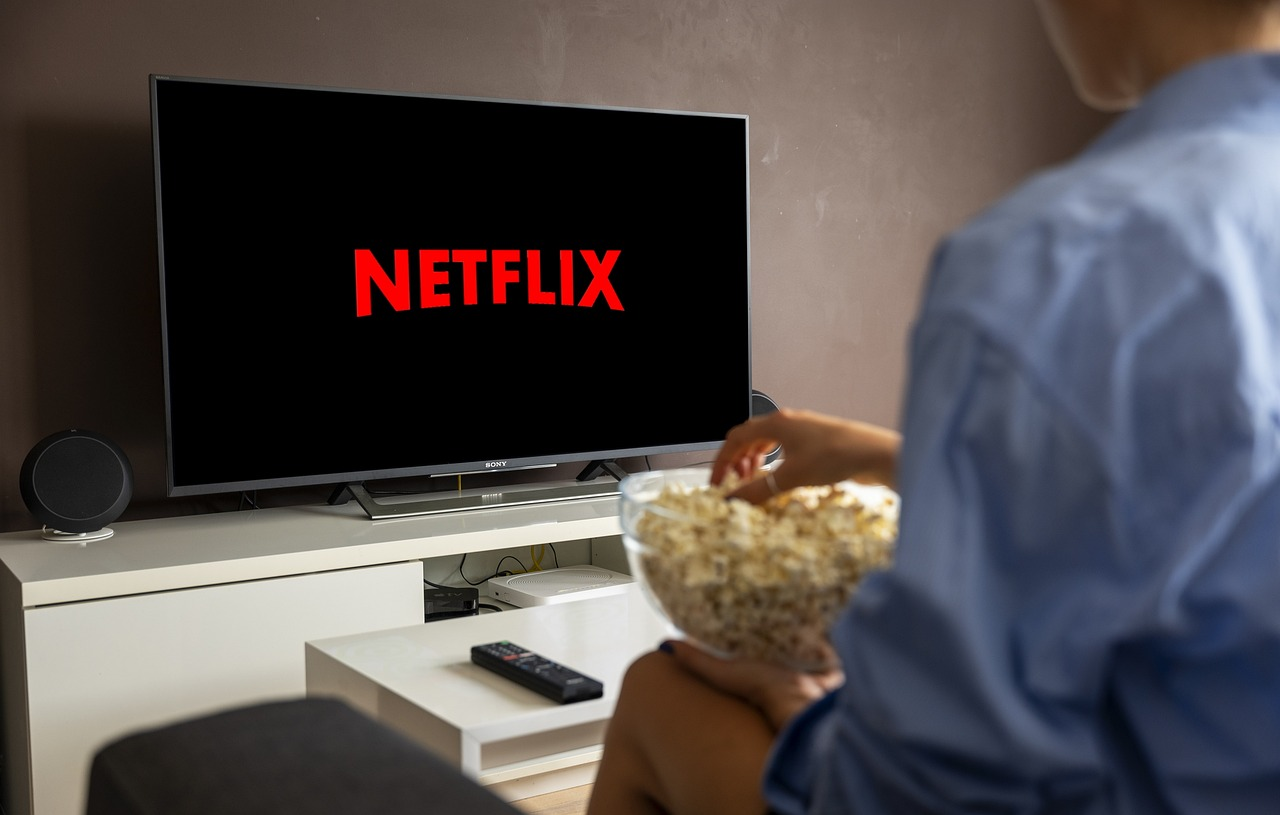

### Dataset: kaggle.com (https://www.kaggle.com/datasets/anandshaw2001/netflix-movies-and-tv-shows/data)

# Imports

In [577]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

# Data Exploration and Cleaning

In [578]:
data = pd.read_csv('./netflix_titles.csv', encoding='utf-8')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [579]:
data.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [580]:
data = data.drop(columns="show_id")

In [581]:
print("Data shape:", data.shape)
print('Data Columns:', data.columns.tolist())

Data shape: (8807, 11)
Data Columns: ['type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [582]:
data['title'].nunique()

8807

## Chceck for Nan values

In [583]:
data.isna().values.any()

True

In [584]:
data.isna().sum()

,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3
listed_in,0


In [585]:
data.shape

(8807, 11)

In [586]:
data = data.dropna(subset=['duration'])
data = data.dropna(subset=['rating'])
data = data.dropna(subset=['date_added'])

## Check for duplicates

In [587]:
data.duplicated().values.any()

False

In [588]:
missing_values = data[data.isna().values]
print(len(missing_values))

4275


In [589]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      6169 non-null   object
 3   cast          7965 non-null   object
 4   country       7961 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
 10  description   8790 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.1+ KB


In [590]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Extract numeric duration - create two columns: duration_value and duration_unit

In [594]:
def parse_duration_column(value):
  try:
    elements = value.split()
    val = int(elements[0])
    unit = str(elements[1])
    return val, unit
  except Exception as e:
    return np.nan, np.nan

data['duration_value'], data['duration_unit'] = zip(*data['duration'].apply(parse_duration_column))

### In 'date_added' column convert values from string to datetime

In [595]:
from time import strptime
import datetime

def convert_to_datatime(value):
  try:
    value = value.strip().replace(',', '').split(' ')
    value[0] = strptime(value[0][0:3], '%b').tm_mon
    value = list(map(int, value))
    value = datetime.datetime(value[2], value[0], value[1])
  except Exception:
    pass
  finally:
    return value

data['date_added'] = data['date_added'].apply(convert_to_datatime)

### Convert values from str to list in 'cast' column

In [596]:
def convert_from_str_to_list(value):
  try:
    value = value.strip().split(', ')
  except Exception:
    pass
  finally:
    return value

data['cast'] = data['cast'].apply(convert_from_str_to_list)

## Convert values from str to list in 'country' column

In [597]:
data['country'] = data['country'].apply(convert_from_str_to_list)

### Convert values from str to list in 'listed_in' column

In [598]:
data['listed_in'] = data['listed_in'].apply(lambda x: x.split(', '))

In [599]:
print(data['release_year'].dtype)

int64


## Content type distribution.

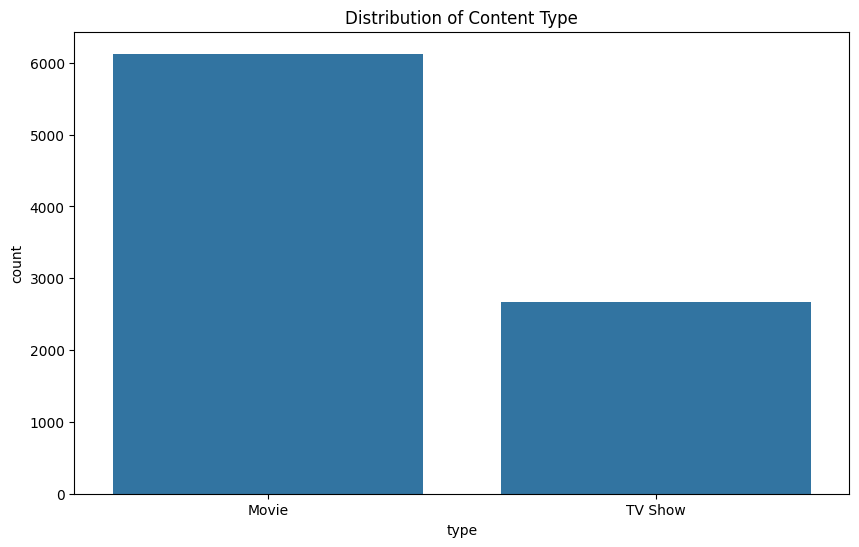

In [600]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='type')
plt.title('Distribution of Content Type')
plt.show()

## Count of Movies vs TV Shows by Release Year.

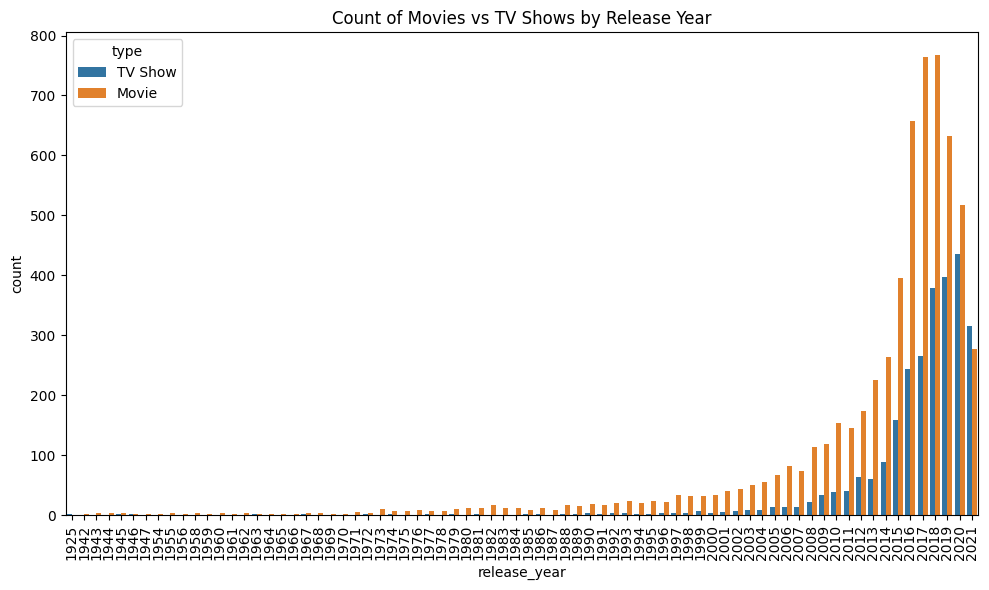

In [601]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='release_year', hue='type')
plt.title('Count of Movies vs TV Shows by Release Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Rating distribution

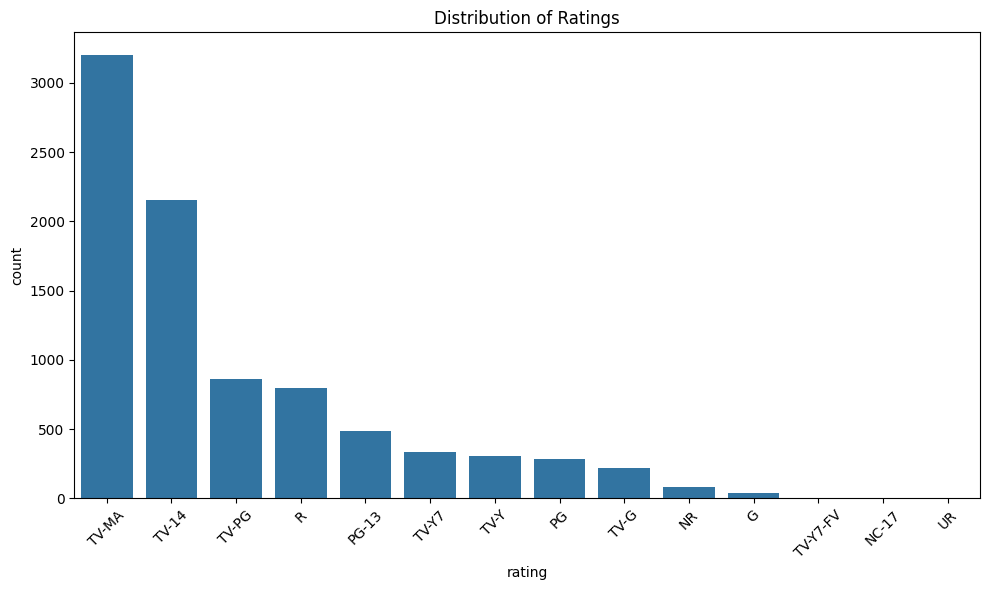

In [602]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='rating', order=data['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Ratings')
plt.tight_layout()
plt.show()

## Duration analysis for movies (minutes)

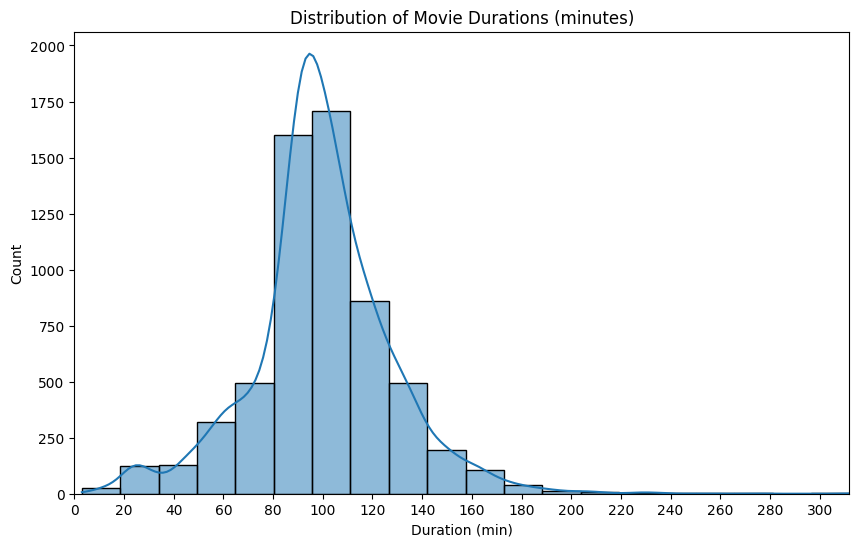

In [603]:
movies = data[['type', 'duration_value']].loc[data['type'] == 'Movie']

plt.figure(figsize=(10,6))
sns.histplot(movies['duration_value'].dropna(), bins=20, kde=True)
plt.title('Distribution of Movie Durations (minutes)')
plt.xlabel('Duration (min)')
plt.xlim(movies['duration_value'].min(), movies['duration_value'].max())
plt.xticks(ticks=np.arange(0, movies['duration_value'].max(), 20))
plt.show()

## Duration analysis for TV Shows (seasons)

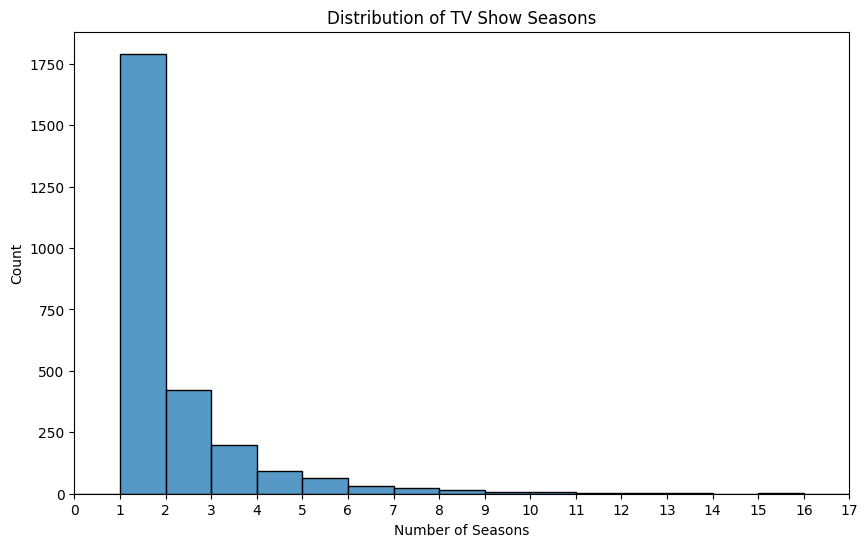

In [604]:
shows = data[['type', 'duration_value']].loc[data['type'] == 'TV Show']

plt.figure(figsize=(10,6))
sns.histplot(shows['duration_value'].dropna(), bins=range(0, int(shows['duration_value'].max())+2))
plt.title('Distribution of TV Show Seasons')
plt.xlim(shows['duration_value'].min()-1, shows['duration_value'].max())
plt.xticks(ticks=np.arange(shows['duration_value'].min()-1, shows['duration_value'].max()+1, 1))
plt.xlabel('Number of Seasons')
plt.show()

## Countries where the largest number of films were produced.

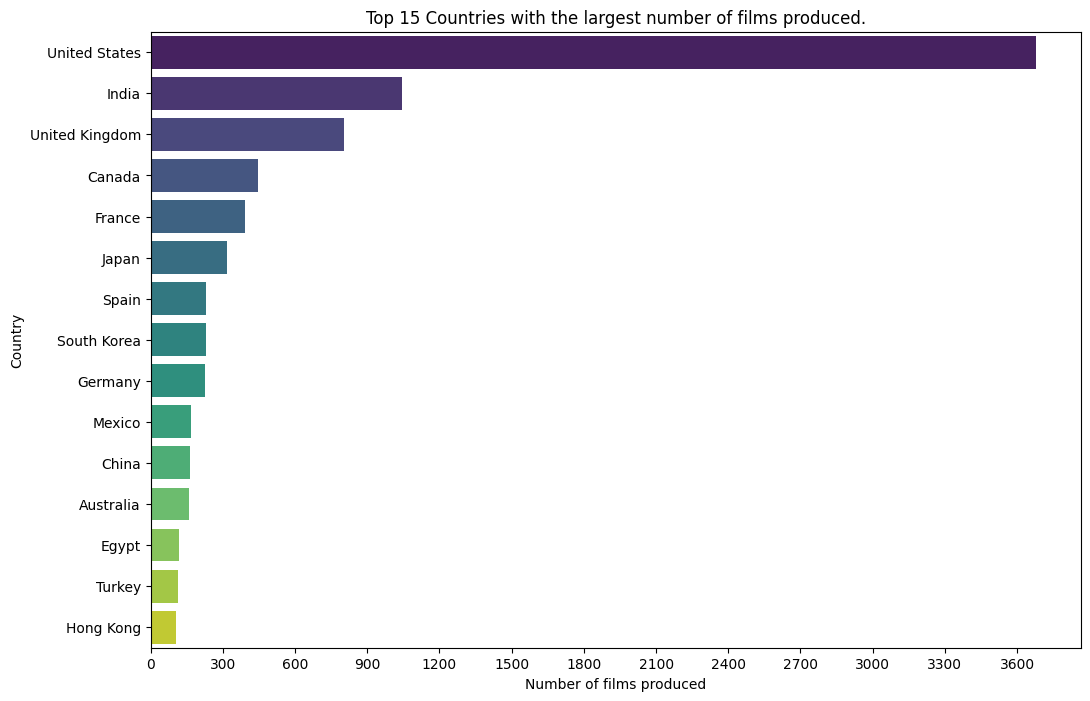

In [615]:
country_df = data['country'].dropna().copy()
country_exploded = country_df.explode('country')

plt.figure(figsize=(12,8))
country_counts = country_exploded.value_counts().head(15)
sns.barplot(x=country_counts.values, hue=country_counts.index, y=country_counts.index, palette='viridis')
plt.title('Top 15 Countries with the largest number of films produced.')
plt.xlabel('Number of films produced')
plt.ylabel('Country')
plt.xticks(ticks=np.arange(0, country_counts.values.max(), 300))
plt.show()

## The most popular genres/categories.

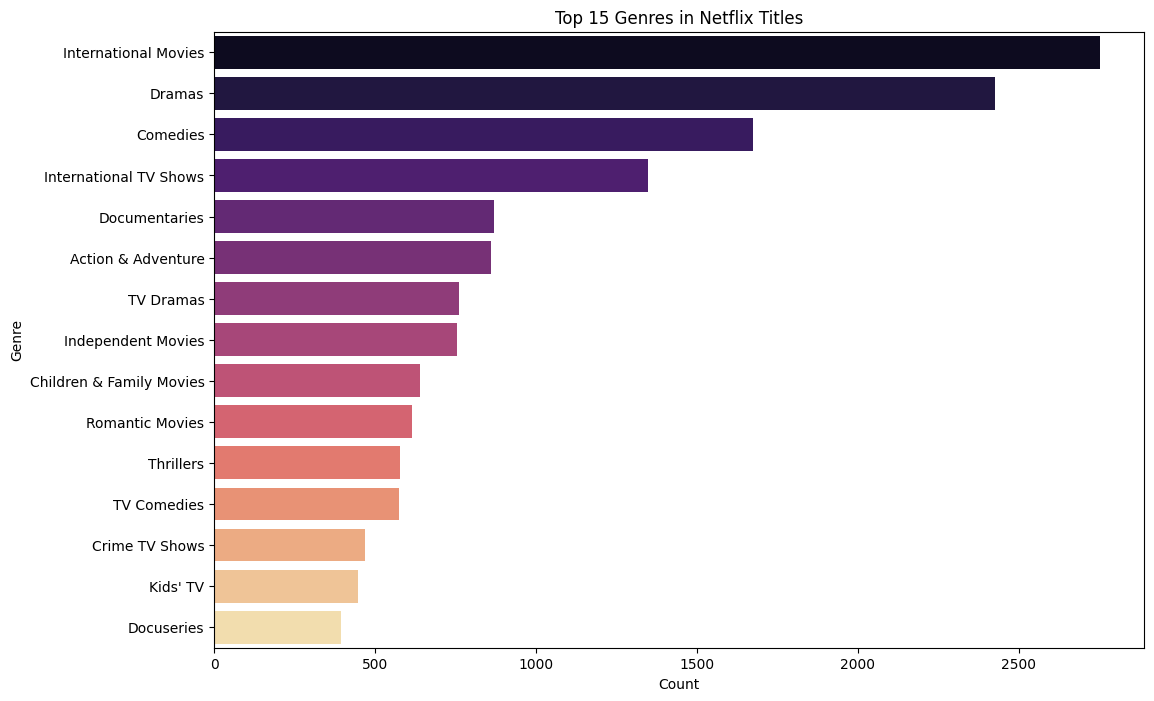

In [613]:
genre_df = data['listed_in'].dropna().copy()
genre_exploded = genre_df.explode()

plt.figure(figsize=(12,8))
genre_counts = genre_exploded.value_counts().head(15)
sns.barplot(x=genre_counts.values, hue=genre_counts.index, y=genre_counts.index, palette='magma')
plt.title('Top 15 Genres in Netflix Titles')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## Popularity of genres/categories in general.

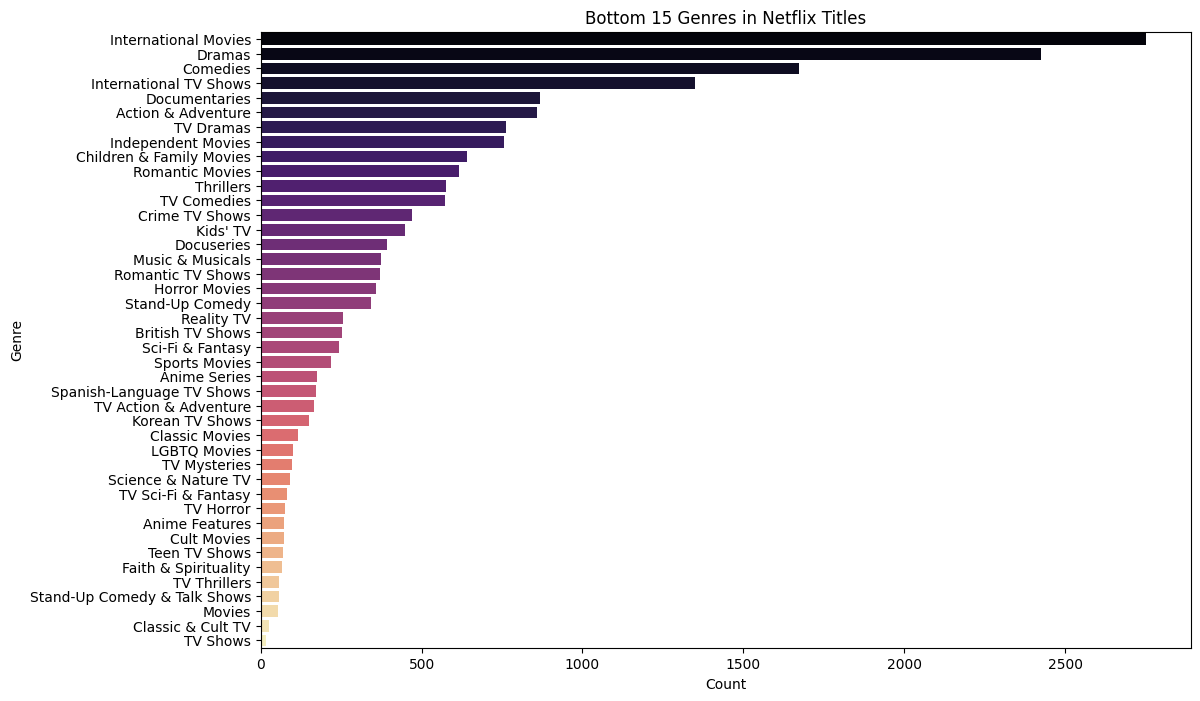

In [614]:
genre_df = data['listed_in'].dropna().copy()
genre_exploded = genre_df.explode()

plt.figure(figsize=(12,8))
genre_counts = genre_exploded.value_counts()
sns.barplot(x=genre_counts.values, hue=genre_counts.index, y=genre_counts.index, palette='magma')
plt.title('Bottom 15 Genres in Netflix Titles')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## Number of titles added (monthly).

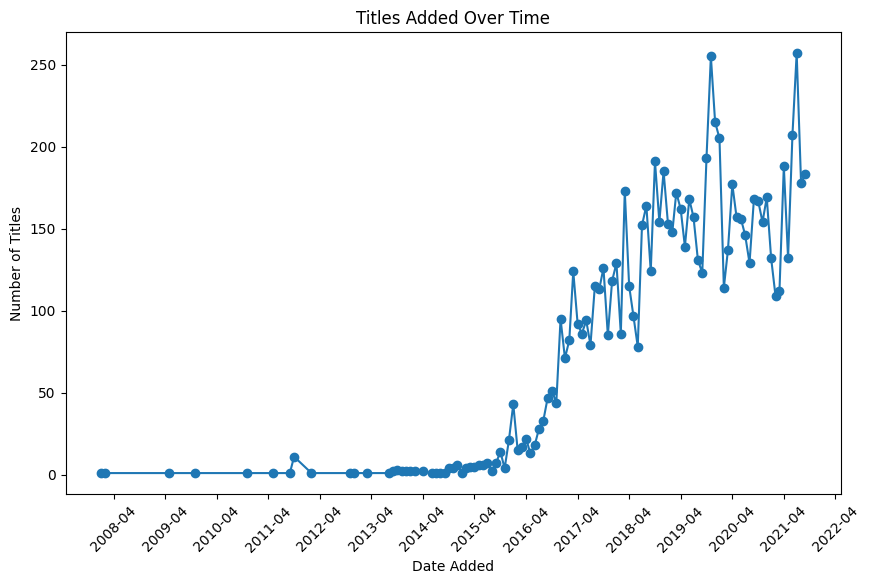

In [608]:
fig, ax = plt.subplots(figsize=(10, 6))

date_counts = data['date_added'].dt.to_period('M').value_counts().sort_index()
date_counts.index = date_counts.index.to_timestamp()
ax.plot(date_counts.index, date_counts.values, marker='o')
ax.set_title('Titles Added Over Time')
ax.set_xlabel('Date Added')
ax.set_ylabel('Number of Titles')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.show()

## Number of titles added (per year).

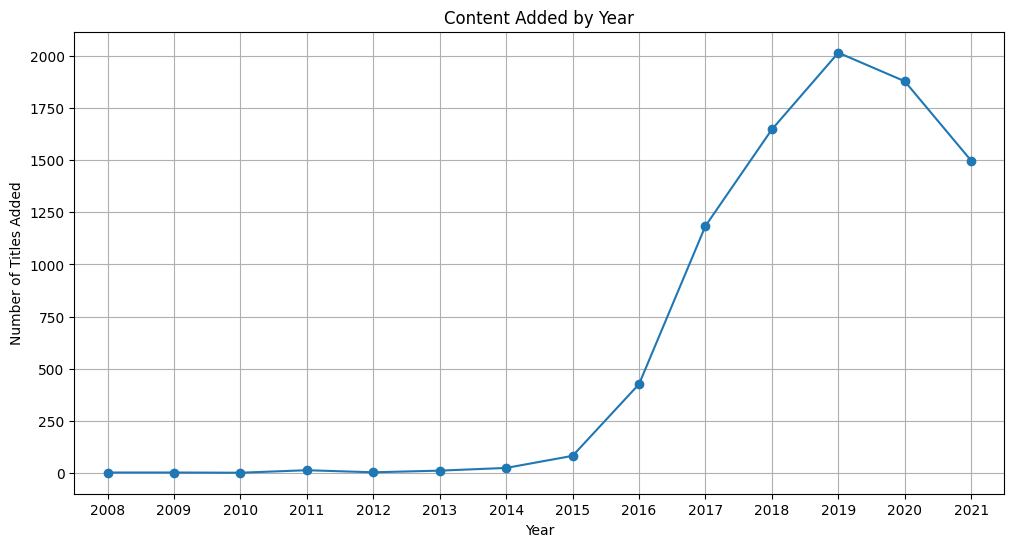

In [609]:
plt.figure(figsize=(12,6))
data['year_added'] = data['date_added'].dt.year
yearly_additions = data['year_added'].value_counts().sort_index()
plt.plot(yearly_additions.index, yearly_additions.values, marker='o')
plt.title('Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(ticks=np.arange(data['year_added'].min(), data['year_added'].max()+1, 1))
plt.xlim(data['year_added'].min()-0.5, data['year_added'].max()+0.5)
plt.grid(True)
plt.show()

## Conslusions:
1. Content Distribution:  
* Netflix's library is dominated by movies (69.6%) compared to TV shows (30.4%)
2. Genres:  
* International content forms a significant portion of the library  
* Strong focus on Dramas and Comedies  
3. Geographical Distribution:  
* US dominates content production  
* India and UK are significant content producers  
* Emerging markets show growing presence
4. Content Release Trends:  
* Recent years show increased content production  
* TV Shows have seen particular growth in recent years
5. Rating Distribution:  
* Diverse rating categories cater to different audience segments  
* Strong presence of mature content (TV-MA)
6. Content Addition Over Time:  
* Shows steady growth in content acquisition  
* Recent years show aggressive content addition
